<a href="https://colab.research.google.com/github/AlexisUMM/Chart.js/blob/master/CHF_EUR_Mayor_Rendimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---



 ##  Entrevista inicial

 ## Marcial Mexicano Alexis Uriel  

* ##  Correo electronico: amarcialmex@gmail.com

* ##  Telefono: 5544732128

* ##  Fecha: 28/09/2023







---





Primero, analizaremos la paridad entre el franco suizo (CHF) y el dólar estadounidense (USD) [CHF/USD].  
Vamos a combinar los datos de dos archivos de Excel en uno solo y analizaremos la situación para los meses de julio de 2023 (202307), agosto de 2023 (202308) y para la union de ambos meses.

Nombraremos el archivo correspondiente a CHF 202307 como CHF202307, al archivo de CHF 202308 como CHF202308 y al archivo combinado como CHF, que tendra la union de ambos datos.

En primer lugar, graficaremos el precio de cierre del par CHF/USD para visualizar cualquier tendencia o patrón. Posteriormente, calcularemos la volatilidad de los precios para evaluar la variabilidad en el mercado.



In [7]:
import pandas as pd #biblioteca para mandar a llamar las bases de datos
CHF202307 = pd.read_csv('CHF 202307.csv')
CHF202308 = pd.read_csv('CHF 202308.csv')

# Unir los dos DataFrames en uno solo
CHF = pd.concat([CHF202307, CHF202308], ignore_index=True)

# Guardar el DataFrame unido en un nuevo archivo de Excel
CHF.to_excel('CHF 202307 y 202308.xlsx', index=False)


In [8]:
# Combinar las columnas "Date" y "Hour" en una nueva columna llamada "Date_Hour"
CHF['Date_Hour'] = CHF['Date'].astype(str) + ' ' + CHF['Hour'].astype(str)

# Opcionalmente, puedes eliminar las columnas originales si ya no las necesitas
#CHF = CHF.drop(['Hour', 'Date'], axis=1)

# Ordenar el DataFrame por la columna "fecha_hora" en orden descendente
#CHF = CHF.sort_values(by='Date_Hour', ascending=False)

# Guardar el DataFrame ordenado en un nuevo archivo de Excel
CHF.to_excel('CHF 202307 y 202308 Ordenado.xlsx', index=False)


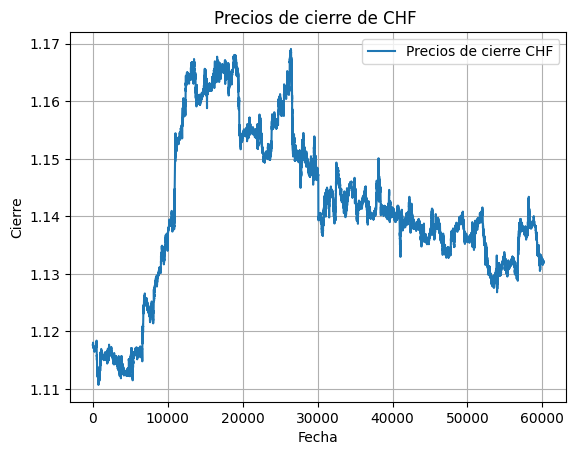

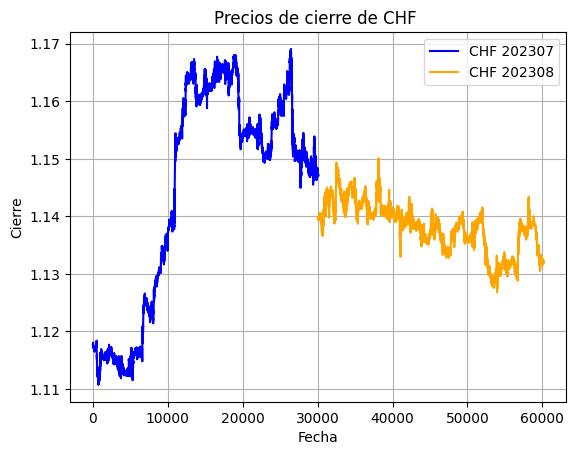

In [33]:
import numpy as np
import matplotlib.pyplot as plt

#------------inicia grafica de rendimientos de precios de cierre---------------------------
plt.plot(CHF['Close'], label='Precios de cierre CHF')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cierre')
plt.title('Precios de cierre de CHF ')
plt.grid(True)
plt.show()
#------------Termina grafica de rendimientos de cierre---------------------------

#------------inicia grafica de rendimientos de precios de cierre comparacion---------------------------
x1 = range(len(CHF202307))
x2 = range(len(CHF202307) , len(CHF202307) + len(CHF202308))
plt.plot(x1, CHF202307['Close'], label='CHF 202307', color='blue')
plt.plot(x2, CHF202308['Close'] , label='CHF 202308', color='orange')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cierre')
plt.title('Precios de cierre de CHF ')
plt.grid(True)
plt.show()
#------------Termina grafica de rendimientos de cierre comparacion ---------------------------



En los graficos anteriores podemos ver que en CHF202307 tuvo una tendencia a crecer, CHF202308 tiende a decrecer de una forma constante.
A simple vista se puede ver que CHF202307 tiene una mayor volatibilidad que CHF202308, ahora si los 2 periodos los vemos como uno solo (CHF) este tiene una mayor volatibilidad que los 2 mencionados.  

A continuacion calcularemos la volatibilidad.

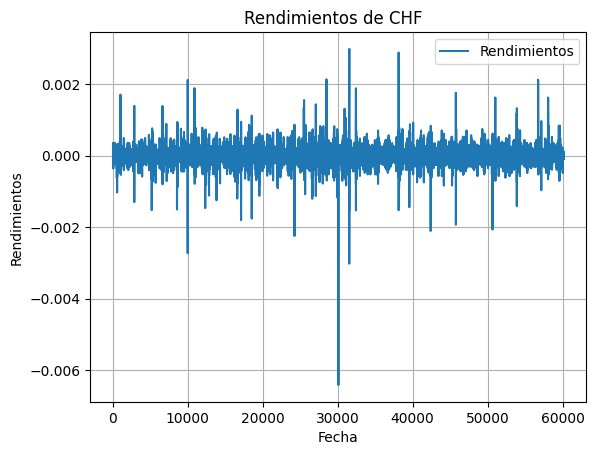

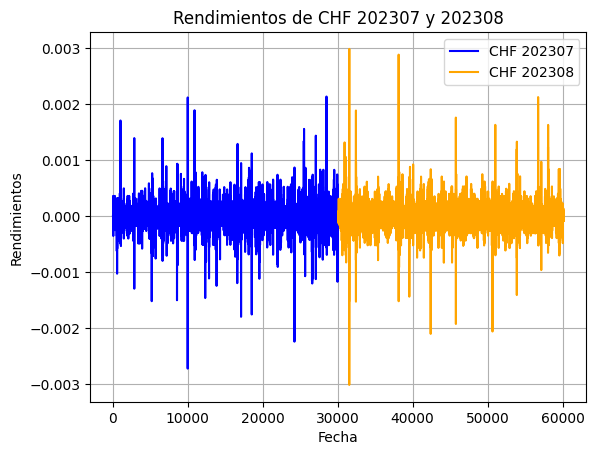

In [34]:
CHF['Rendimiento'] = CHF['Close'].pct_change() #Rendimientos de CHF
CHF202307['Rendimiento'] = CHF202307['Close'].pct_change() #Rendimientos de CHF
CHF202308['Rendimiento'] = CHF202308['Close'].pct_change() #Rendimientos de CHF

#------------inicia grafica de rendimientos de CHF---------------------------
plt.plot(CHF['Rendimiento'], label='Rendimientos')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Rendimientos')
plt.title('Rendimientos de CHF  ')
plt.grid(True)
plt.show()
#------------Termina grafica de rendimientos de CHF---------------------------


#------------inicia grafica de rendimientos de precios de cierre comparacion---------------------------
x1 = range(len(CHF202307))
x2 = range(len(CHF202307) , len(CHF202307) + len(CHF202308))
plt.plot(x1, CHF202307['Rendimiento'], label='CHF 202307', color='blue')
plt.plot(x2, CHF202308['Rendimiento'] , label='CHF 202308', color='orange')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Rendimientos')
plt.title('Rendimientos de CHF 202307 y 202308')
plt.grid(True)
plt.show()
#------------Termina grafica de rendimientos de cierre comparacion ---------------------------



https://admiralmarkets.com/latam/education/articles/forex-basics/por-que-el-mercado-de-divisas-funciona-24-horas-al-dia#:~:text=Otro%20factor%20que%20contribuye%20a,d%C3%ADa%20es%20su%20gran%20importancia.

En el siguiente enlace se puede observar que las divisas cotizan las 24 horas del día, todos los días del año.

In [11]:

minutos_por_dia = 60*24
Dias_por_mes = 30
Dias_por_bimestre = 60
dias_por_año = 365

In [12]:
CHF_volatilidad_Por_Minuto = CHF['Rendimiento'].std()


CHF_volatilidad_diaria = CHF_volatilidad_Por_Minuto * np.sqrt(minutos_por_dia)

CHF_volatilidad_mensual = CHF_volatilidad_diaria * np.sqrt(Dias_por_mes)

CHF_volatilidad_bimestral = CHF_volatilidad_diaria * np.sqrt(Dias_por_bimestre)

CHF_volatilidad_anual = CHF_volatilidad_diaria * np.sqrt(dias_por_año)

print(f"CHF Volatilidad anualizada: {CHF_volatilidad_anual:.5%}")
print(f"CHF Volatilidad bimestral: {CHF_volatilidad_bimestral:.5%}")
print(f"CHF Volatilidad mensual: {CHF_volatilidad_mensual:.5%}")
print(f"CHF Volatilidad Diaria: {CHF_volatilidad_diaria:.5%}")
print(f"CHF Volatilidad por minuto: {CHF_volatilidad_Por_Minuto:.5%}")

CHF Volatilidad anualizada: 10.17176%
CHF Volatilidad bimestral: 4.12406%
CHF Volatilidad mensual: 2.91615%
CHF Volatilidad Diaria: 0.53241%
CHF Volatilidad por minuto: 0.01403%


In [13]:
CHF202307_volatilidad_Por_Minuto = CHF202307['Rendimiento'].std()


CHF202307_volatilidad_diaria = CHF202307_volatilidad_Por_Minuto * np.sqrt(minutos_por_dia)

CHF202307_volatilidad_mensual = CHF202307_volatilidad_diaria * np.sqrt(Dias_por_mes)

CHF202307_volatilidad_bimestral = CHF202307_volatilidad_diaria * np.sqrt(Dias_por_bimestre)

CHF202307_volatilidad_anual = CHF202307_volatilidad_diaria * np.sqrt(dias_por_año)

print(f"CHF202307 Volatilidad anualizada: {CHF202307_volatilidad_anual:.5%}")
print(f"CHF202307 Volatilidad bimestral: {CHF202307_volatilidad_bimestral:.5%}")
print(f"CHF202307 Volatilidad mensual: {CHF202307_volatilidad_mensual:.5%}")
print(f"CHF202307 Volatilidad Diaria: {CHF202307_volatilidad_diaria:.5%}")
print(f"CHF202307 Volatilidad por minuto: {CHF202307_volatilidad_Por_Minuto:.5%}")

CHF202307 Volatilidad anualizada: 10.11020%
CHF202307 Volatilidad bimestral: 4.09911%
CHF202307 Volatilidad mensual: 2.89851%
CHF202307 Volatilidad Diaria: 0.52919%
CHF202307 Volatilidad por minuto: 0.01395%


In [14]:
CHF202308_volatilidad_Por_Minuto = CHF202308['Rendimiento'].std()


CHF202308_volatilidad_diaria = CHF202308_volatilidad_Por_Minuto * np.sqrt(minutos_por_dia)

CHF202308_volatilidad_mensual = CHF202308_volatilidad_diaria * np.sqrt(Dias_por_mes)

CHF202308_volatilidad_bimestral = CHF202308_volatilidad_diaria * np.sqrt(Dias_por_bimestre)

CHF202308_volatilidad_anual = CHF202308_volatilidad_diaria * np.sqrt(dias_por_año)

print(f"CHF202308 Volatilidad anualizada: {CHF202308_volatilidad_anual:.5%}")
print(f"CHF202308 Volatilidad bimestral: {CHF202308_volatilidad_bimestral:.5%}")
print(f"CHF202308 Volatilidad mensual: {CHF202308_volatilidad_mensual:.5%}")
print(f"CHF202308 Volatilidad Diaria: {CHF202308_volatilidad_diaria:.5%}")
print(f"CHF202308 Volatilidad por minuto: {CHF202308_volatilidad_Por_Minuto:.5%}")

CHF202308 Volatilidad anualizada: 9.87646%
CHF202308 Volatilidad bimestral: 4.00434%
CHF202308 Volatilidad mensual: 2.83149%
CHF202308 Volatilidad Diaria: 0.51696%
CHF202308 Volatilidad por minuto: 0.01362%


Con esto podemos afirmar que la volatibilidad de CHF es mayor que la de CHF 202307 Y 202308.  
CHF > CHF202307 > CHF202308



---



Ahora repetiremos lo mismo pero para la paridad Euro contra dolar americano [EUR/USD]

In [15]:
EUR202307 = pd.read_csv('EUR 202307.csv')
EUR202308 = pd.read_csv('EUR 202308.csv')

# Unir los dos DataFrames en uno solo
EUR = pd.concat([EUR202307, EUR202308], ignore_index=True)

# Guardar el DataFrame unido en un nuevo archivo de Excel
EUR.to_excel('EUR 202307 y 202308.xlsx', index=False)

# Combinar las columnas "Date" y "Hour" en una nueva columna llamada "Date_Hour"
EUR['Date_Hour'] = EUR['Date'].astype(str) + ' ' + EUR['Hour'].astype(str)


EUR.to_excel('EUR 202307 y 202308 Ordenado.xlsx', index=False)


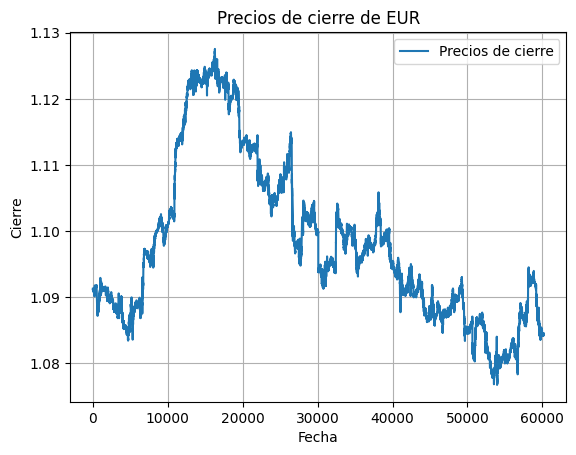

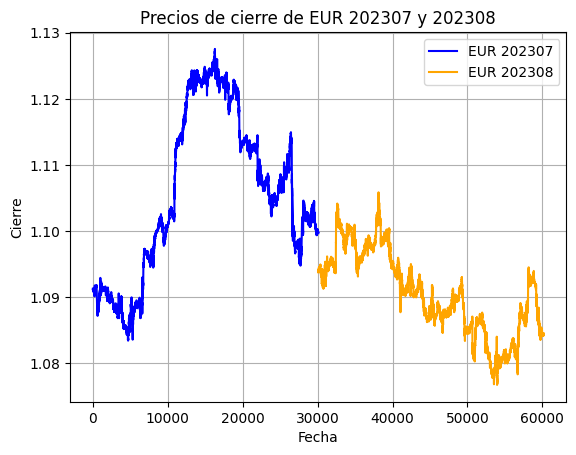

In [35]:
#------------inicia grafica de rendimientos de precios de cierre---------------------------
plt.plot(EUR['Close'], label='Precios de cierre')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cierre')
plt.title('Precios de cierre de EUR')
plt.grid(True)
plt.show()
#------------Termina grafica de rendimientos de cierre---------------------------

#------------inicia grafica de rendimientos de precios de cierre comparacion---------------------------
x1 = range(len(EUR202307))
x2 = range(len(EUR202307) , len(EUR202307) + len(EUR202308))
plt.plot(x1, EUR202307['Close'], label='EUR 202307', color='blue')
plt.plot(x2, EUR202308['Close'] , label='EUR 202308', color='orange')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cierre')
plt.title('Precios de cierre de EUR 202307 y 202308')
plt.grid(True)
plt.show()
#------------Termina grafica de rendimientos de cierre comparacion ---------------------------


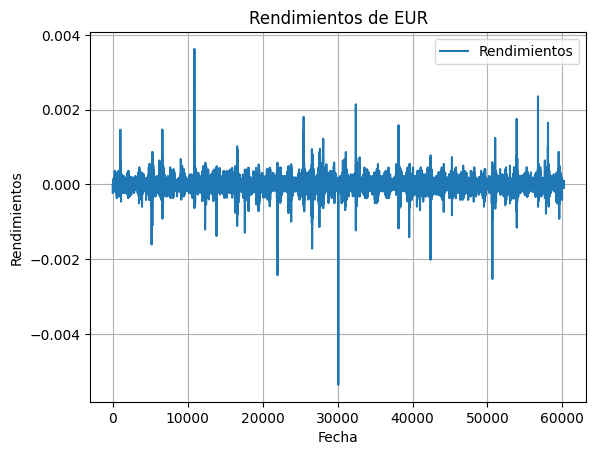

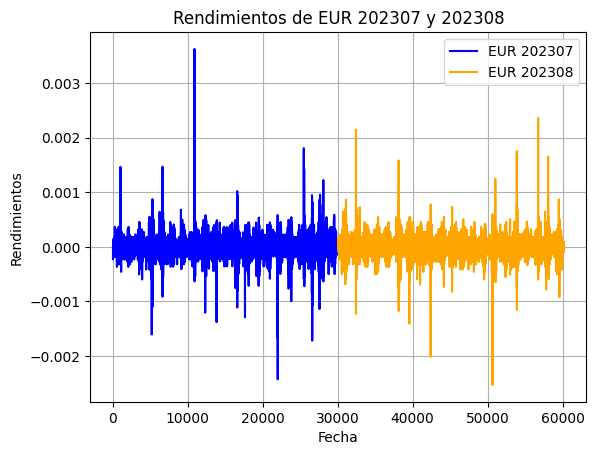

In [36]:
EUR['Rendimiento'] = EUR['Close'].pct_change() #Rendimientos de EUR
EUR202307['Rendimiento'] = EUR202307['Close'].pct_change() #Rendimientos de EUR202307
EUR202308['Rendimiento'] = EUR202308['Close'].pct_change() #Rendimientos de EUR202308

#------------inicia grafica de rendimientos de CHF---------------------------
plt.plot(EUR['Rendimiento'], label='Rendimientos')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Rendimientos')
plt.title('Rendimientos de EUR')
plt.grid(True)
plt.show()
#------------Termina grafica de rendimientos de CHF---------------------------


#------------inicia grafica de rendimientos  comparacion---------------------------
x1 = range(len(EUR202307))
x2 = range(len(EUR202307) , len(EUR202307) + len(EUR202308))
plt.plot(x1, EUR202307['Rendimiento'], label='EUR 202307', color='blue')
plt.plot(x2, EUR202308['Rendimiento'] , label='EUR 202308', color='orange')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Rendimientos')
plt.title('Rendimientos de EUR 202307 y 202308')
plt.grid(True)
plt.show()
#------------Termina grafica de rendimientos comparacion ---------------------------



In [18]:
EUR_volatilidad_Por_Minuto = EUR['Rendimiento'].std()


EUR_volatilidad_diaria = EUR_volatilidad_Por_Minuto * np.sqrt(minutos_por_dia)

EUR_volatilidad_mensual = EUR_volatilidad_diaria * np.sqrt(Dias_por_mes)

EUR_volatilidad_bimestral = EUR_volatilidad_diaria * np.sqrt(Dias_por_bimestre)

EUR_volatilidad_anual = EUR_volatilidad_diaria * np.sqrt(dias_por_año)

print(f"EUR Volatilidad anualizada: {EUR_volatilidad_anual:.5%}")
print(f"EUR Volatilidad bimestral: {EUR_volatilidad_bimestral:.5%}")
print(f"EUR Volatilidad mensual: {EUR_volatilidad_mensual:.5%}")
print(f"EUR Volatilidad Diaria: {EUR_volatilidad_diaria:.5%}")
print(f"EUR Volatilidad por minuto: {EUR_volatilidad_Por_Minuto:.5%}")

EUR Volatilidad anualizada: 8.59209%
EUR Volatilidad bimestral: 3.48360%
EUR Volatilidad mensual: 2.46328%
EUR Volatilidad Diaria: 0.44973%
EUR Volatilidad por minuto: 0.01185%


In [19]:
EUR202307_volatilidad_Por_Minuto = EUR202307['Rendimiento'].std()


EUR202307_volatilidad_diaria = EUR202307_volatilidad_Por_Minuto * np.sqrt(minutos_por_dia)

EUR202307_volatilidad_mensual = EUR202307_volatilidad_diaria * np.sqrt(Dias_por_mes)

EUR202307_volatilidad_bimestral = EUR202307_volatilidad_diaria * np.sqrt(Dias_por_bimestre)

EUR202307_volatilidad_anual = EUR202307_volatilidad_diaria * np.sqrt(dias_por_año)

print(f"EUR202307 Volatilidad anualizada: {EUR202307_volatilidad_anual:.5%}")
print(f"EUR202307 Volatilidad bimestral: {EUR202307_volatilidad_bimestral:.5%}")
print(f"EUR202307 Volatilidad mensual: {EUR202307_volatilidad_mensual:.5%}")
print(f"EUR202307 Volatilidad Diaria: {EUR202307_volatilidad_diaria:.5%}")
print(f"EUR202307 Volatilidad por minuto: {EUR202307_volatilidad_Por_Minuto:.5%}")

EUR202307 Volatilidad anualizada: 8.57686%
EUR202307 Volatilidad bimestral: 3.47742%
EUR202307 Volatilidad mensual: 2.45891%
EUR202307 Volatilidad Diaria: 0.44893%
EUR202307 Volatilidad por minuto: 0.01183%


In [20]:
EUR202308_volatilidad_Por_Minuto = EUR202308['Rendimiento'].std()


EUR202308_volatilidad_diaria = EUR202308_volatilidad_Por_Minuto * np.sqrt(minutos_por_dia)

EUR202308_volatilidad_mensual = EUR202308_volatilidad_diaria * np.sqrt(Dias_por_mes)

EUR202308_volatilidad_bimestral = EUR202308_volatilidad_diaria * np.sqrt(Dias_por_bimestre)

EUR202308_volatilidad_anual = EUR202308_volatilidad_diaria * np.sqrt(dias_por_año)

print(f"EUR202308 Volatilidad anualizada: {EUR202308_volatilidad_anual:.5%}")
print(f"EUR202308 Volatilidad bimestral: {EUR202308_volatilidad_bimestral:.5%}")
print(f"EUR202308 Volatilidad mensual: {EUR202308_volatilidad_mensual:.5%}")
print(f"EUR202308 Volatilidad Diaria: {EUR202308_volatilidad_diaria:.5%}")
print(f"EUR202308 Volatilidad por minuto: {EUR202308_volatilidad_Por_Minuto:.5%}")

EUR202308 Volatilidad anualizada: 8.31030%
EUR202308 Volatilidad bimestral: 3.36935%
EUR202308 Volatilidad mensual: 2.38249%
EUR202308 Volatilidad Diaria: 0.43498%
EUR202308 Volatilidad por minuto: 0.01146%


Con esto podemos afirmar que la volatibilidad de EUR es mayor que la de EUR 202307 Y 202308.  
EUR > EUR202307 > EUR202308




---

Ahora compararemos ambas paridades CHF Y EUR



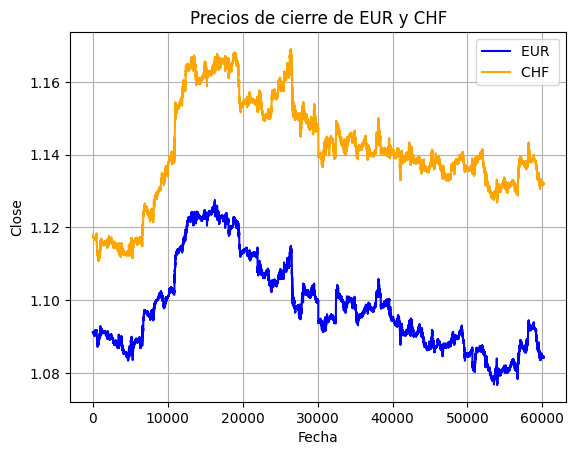

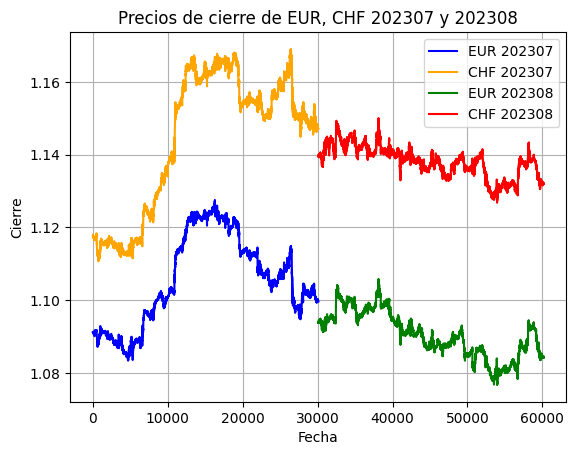

In [37]:
#------------inicia grafica de precios de cierre comparacion---------------------------
x1 = range(len(EUR202307))
x2 = range(len(EUR202307) , len(EUR202307) + len(EUR202308))
plt.plot(EUR['Close'], label='EUR ', color='blue')
plt.plot( CHF['Close'] , label='CHF ', color='orange')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.title('Precios de cierre de EUR y CHF')
plt.grid(True)
plt.show()
#------------Termina grafica de precios de cierre comparacion---------------------------

#------------inicia grafica de rendimientos de precios de cierre comparacion---------------------------
x1 = range(len(EUR202307))
x2 = range(len(EUR202307) , len(EUR202307) + len(EUR202308))
plt.plot(x1, EUR202307['Close'], label='EUR 202307', color='blue')
plt.plot(x1, CHF202307['Close'], label='CHF 202307', color='orange')

plt.plot(x2, EUR202308['Close'] , label='EUR 202308', color='green')
plt.plot(x2, CHF202308['Close'] , label='CHF 202308', color='red')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cierre')
plt.title('Precios de cierre de EUR, CHF 202307 y 202308')
plt.grid(True)
plt.show()
#------------Termina grafica de rendimientos de cierre comparacion ---------------------------


Como se puede ver en las graficas ambas presentan un comportamiento muy similar, ya sea por el periodo 202307, 202308 o la union de ambos, para poder ver cual tiene mayor variacion compararemos la volatibilidad y nos quedaremos con la mayor.

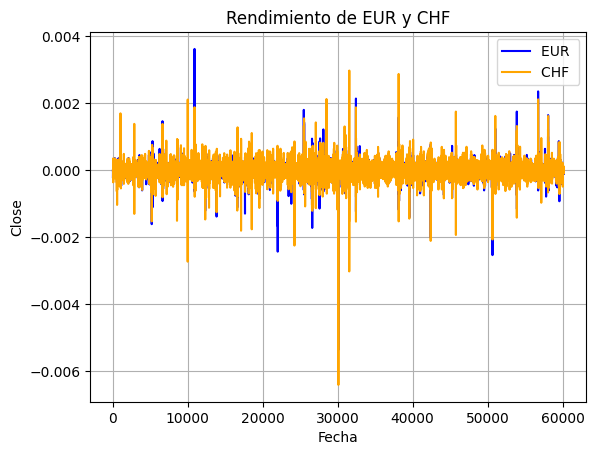

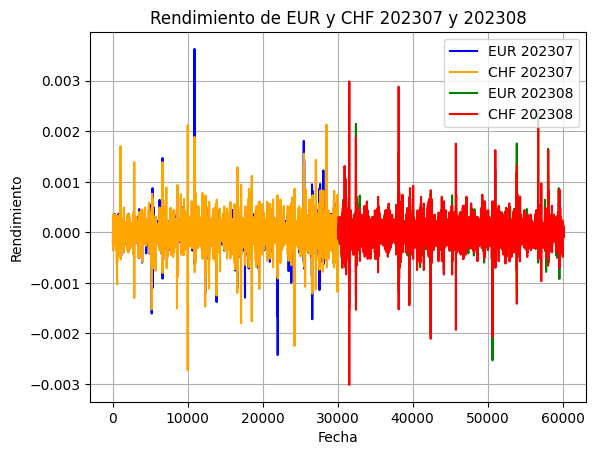

In [22]:
#------------inicia grafica de rendimientos comparacion---------------------------
x1 = range(len(EUR202307))
x2 = range(len(EUR202307) , len(EUR202307) + len(EUR202308))
plt.plot(EUR['Rendimiento'], label='EUR ', color='blue')
plt.plot( CHF['Rendimiento'] , label='CHF ', color='orange')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Close')
plt.title('Rendimiento de EUR y CHF')
plt.grid(True)
plt.show()
#------------Termina grafica de rendimientos  comparacion---------------------------

#------------inicia grafica de rendimientos comparacion---------------------------
x1 = range(len(EUR202307))
x2 = range(len(EUR202307) , len(EUR202307) + len(EUR202308))
plt.plot(x1, EUR202307['Rendimiento'], label='EUR 202307', color='blue')
plt.plot(x1, CHF202307['Rendimiento'], label='CHF 202307', color='orange')

plt.plot(x2, EUR202308['Rendimiento'] , label='EUR 202308', color='green')
plt.plot(x2, CHF202308['Rendimiento'] , label='CHF 202308', color='red')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Rendimiento')
plt.title('Rendimiento de EUR y CHF 202307 y 202308')
plt.grid(True)
plt.show()
#------------Termina grafica de rendimientos  comparacion ---------------------------


In [31]:
print(f" Volatilidad anualizada: \n CHF: {CHF_volatilidad_anual:.5%} ,  EUR: {EUR_volatilidad_anual:.5%}")
print(f" CHF202307: {CHF202307_volatilidad_anual:.5%} ,  EUR202307: {EUR202307_volatilidad_anual:.5%} ")
print(f" CHF202308: {CHF202308_volatilidad_anual:.5%} ,  EUR202308: {EUR202308_volatilidad_anual:.5%} \n")


print(f" Volatilidad bimestral: \n CHF: {CHF_volatilidad_bimestral:.5%} ,  EUR: {EUR_volatilidad_bimestral:.5%}")
print(f" CHF202307: {CHF202307_volatilidad_bimestral:.5%} ,  EUR202307: {EUR202307_volatilidad_bimestral:.5%} ")
print(f" CHF202308: {CHF202308_volatilidad_bimestral:.5%} ,  EUR202308: {EUR202308_volatilidad_bimestral:.5%} \n")


print(f" Volatilidad mensual: \n CHF: {CHF_volatilidad_mensual:.5%} ,  EUR: {EUR_volatilidad_mensual:.5%}")
print(f" CHF202307: {CHF202307_volatilidad_mensual:.5%} ,  EUR202307: {EUR202307_volatilidad_mensual:.5%} ")
print(f" CHF202308: {CHF202308_volatilidad_mensual:.5%} ,  EUR202308: {EUR202308_volatilidad_mensual:.5%} \n")


print(f" Volatilidad Diaria: \n CHF: {CHF_volatilidad_diaria:.5%} ,  EUR: {EUR_volatilidad_diaria:.5%}\n ")
print(f" CHF202307: {CHF202307_volatilidad_diaria:.5%} ,  EUR202307: {EUR202307_volatilidad_diaria:.5%} ")
print(f" CHF202308: {CHF202308_volatilidad_diaria:.5%} ,  EUR202308: {EUR202308_volatilidad_diaria:.5%} \n")


print(f" Volatilidad por minuto: \n CHF: {CHF_volatilidad_Por_Minuto:.5%} ,  EUR: {EUR_volatilidad_Por_Minuto:.5%}")
print(f" CHF202307: {CHF202307_volatilidad_Por_Minuto:.5%} ,  EUR202307: {EUR202307_volatilidad_Por_Minuto:.5%} ")
print(f" CHF202308: {CHF202308_volatilidad_Por_Minuto:.5%} ,  EUR202308: {EUR202308_volatilidad_Por_Minuto:.5%} \n")

 Volatilidad anualizada: 
 CHF: 10.17176% ,  EUR: 8.59209%
 CHF202307: 10.11020% ,  EUR202307: 8.57686% 
 CHF202308: 9.87646% ,  EUR202308: 8.31030% 

 Volatilidad bimestral: 
 CHF: 4.12406% ,  EUR: 3.48360%
 CHF202307: 4.09911% ,  EUR202307: 3.47742% 
 CHF202308: 4.00434% ,  EUR202308: 3.36935% 

 Volatilidad mensual: 
 CHF: 2.91615% ,  EUR: 2.46328%
 CHF202307: 2.89851% ,  EUR202307: 2.45891% 
 CHF202308: 2.83149% ,  EUR202308: 2.38249% 

 Volatilidad Diaria: 
 CHF: 0.53241% ,  EUR: 0.44973%
 
 CHF202307: 0.52919% ,  EUR202307: 0.44893% 
 CHF202308: 0.51696% ,  EUR202308: 0.43498% 

 Volatilidad por minuto: 
 CHF: 0.01403% ,  EUR: 0.01185%
 CHF202307: 0.01395% ,  EUR202307: 0.01183% 
 CHF202308: 0.01362% ,  EUR202308: 0.01146% 



Como se puede observar en las volatibilidades CHF presentan una mayor volatibilidad que EUR.  
Por lo que la paridad Franco suizo contra dolar americano te puede dar un mejor rendimiento.  
Los activos con mayor volatibilidad pueden tener un mayor rendimiento, pero a la vez implica un mayor riesgo.

Libro de consulta:  
Introduccion a los mercados de futuros y opciones. John C. Hull, sexta edicion.  
ver capitulo  12.3 y 12.4.